In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd

from ipywidgets import widgets

In [2]:
from implementations import frames_to_time, amplitude_envelope, rms, zcr, dft, fft
from utilities import plot_waveform, plot_fourier_transform

## First load example sound files and display their waveforms

In [3]:
# Use librosa to load in the sound files
snaredrum, sr = librosa.load("example_data/snaredrum_2.wav")
hihat, _ = librosa.load("example_data/hihat_3.wav")
clarinet, _ = librosa.load("example_data/clarinet.wav")

In [4]:
# Set the styling of the widget outputs
css_widget = widgets.HTML("<style> .cell-output-ipywidget-background{background-color: transparent !important;} h3{color: white; text-align: center;}</style>")
ipd.display(css_widget)

# Listen to the soundfiles
elements = []
elements.append(widgets.VBox([widgets.HTML("<h3> Snaredrum </h3>"), widgets.Audio(value=ipd.Audio(data=snaredrum, rate=sr).data)]))
elements.append(widgets.VBox([widgets.HTML("<h3> Hihat </h3>"), widgets.Audio(value=ipd.Audio(data=hihat, rate=sr).data)]))
elements.append(widgets.VBox([widgets.HTML("<h3> Clarinet </h3>"), widgets.Audio(value=ipd.Audio(data=clarinet, rate=sr).data)]))
ipd.display(widgets.HBox(elements))

HTML(value='<style> .cell-output-ipywidget-background{background-color: transparent !important;} h3{color: whi…

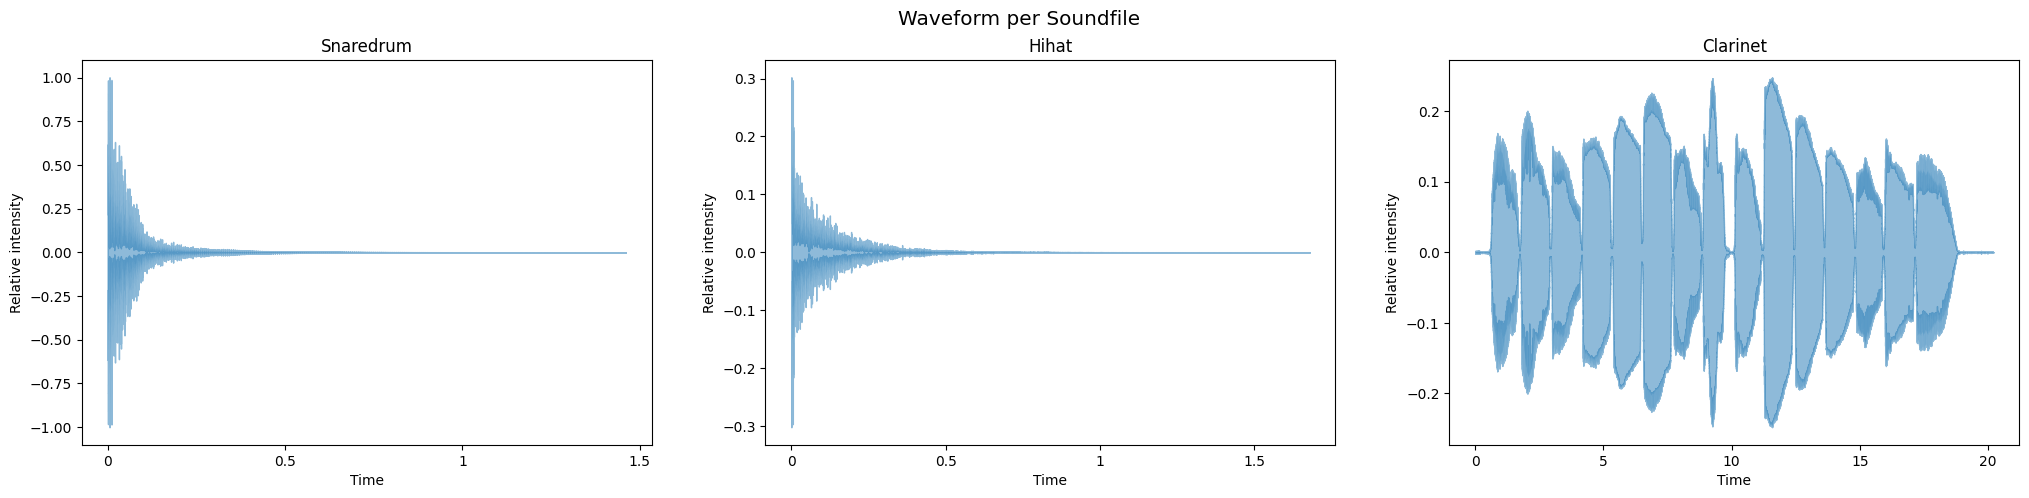

In [5]:
# Plot on different subplots
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")

plt.suptitle("Waveform per Soundfile", fontsize="x-large")
plt.show()

## For each waveform, display the Amplitude Envelope, RMS and Zero-Crossing Rate

In [6]:
# Time domain audio features are calculated over frames
FRAME_SIZE = 2048
HOP_LENGTH = 256

In [7]:
snaredrum_envelope = amplitude_envelope(snaredrum, FRAME_SIZE, HOP_LENGTH)
snaredrum_times = frames_to_time(snaredrum_envelope, HOP_LENGTH)

hihat_envelope = amplitude_envelope(hihat, FRAME_SIZE, HOP_LENGTH)
hihat_times = frames_to_time(hihat_envelope, HOP_LENGTH)

clarinet_envelope = amplitude_envelope(clarinet, FRAME_SIZE, HOP_LENGTH)
clarinet_times = frames_to_time(clarinet_envelope, HOP_LENGTH)

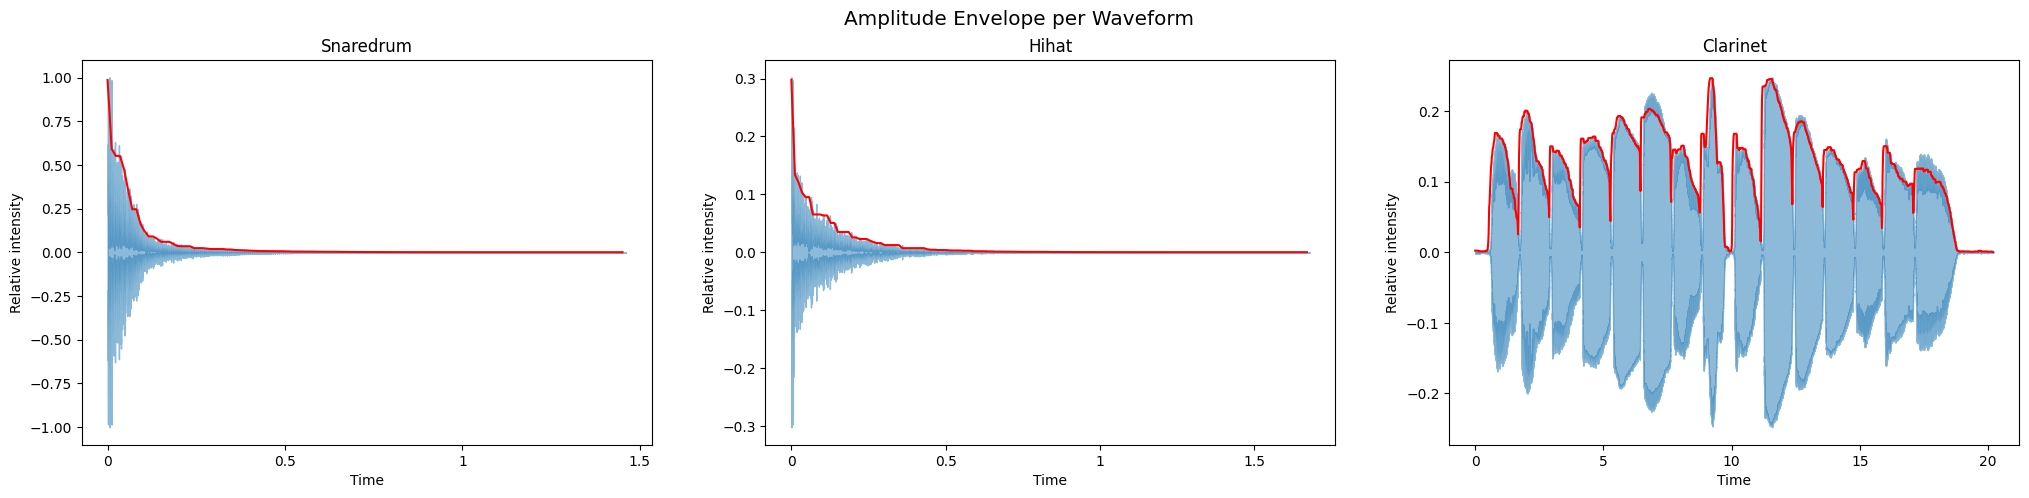

In [8]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")
plt.plot(snaredrum_times, snaredrum_envelope, c="r")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")
plt.plot(hihat_times, hihat_envelope, c="r")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")
plt.plot(clarinet_times, clarinet_envelope, c="r")

plt.suptitle("Amplitude Envelope per Waveform", fontsize="x-large")
plt.show()

In [9]:
snaredrum_rms = rms(snaredrum, FRAME_SIZE, HOP_LENGTH)

hihat_rms = rms(hihat, FRAME_SIZE, HOP_LENGTH)

clarinet_rms = rms(clarinet, FRAME_SIZE, HOP_LENGTH)

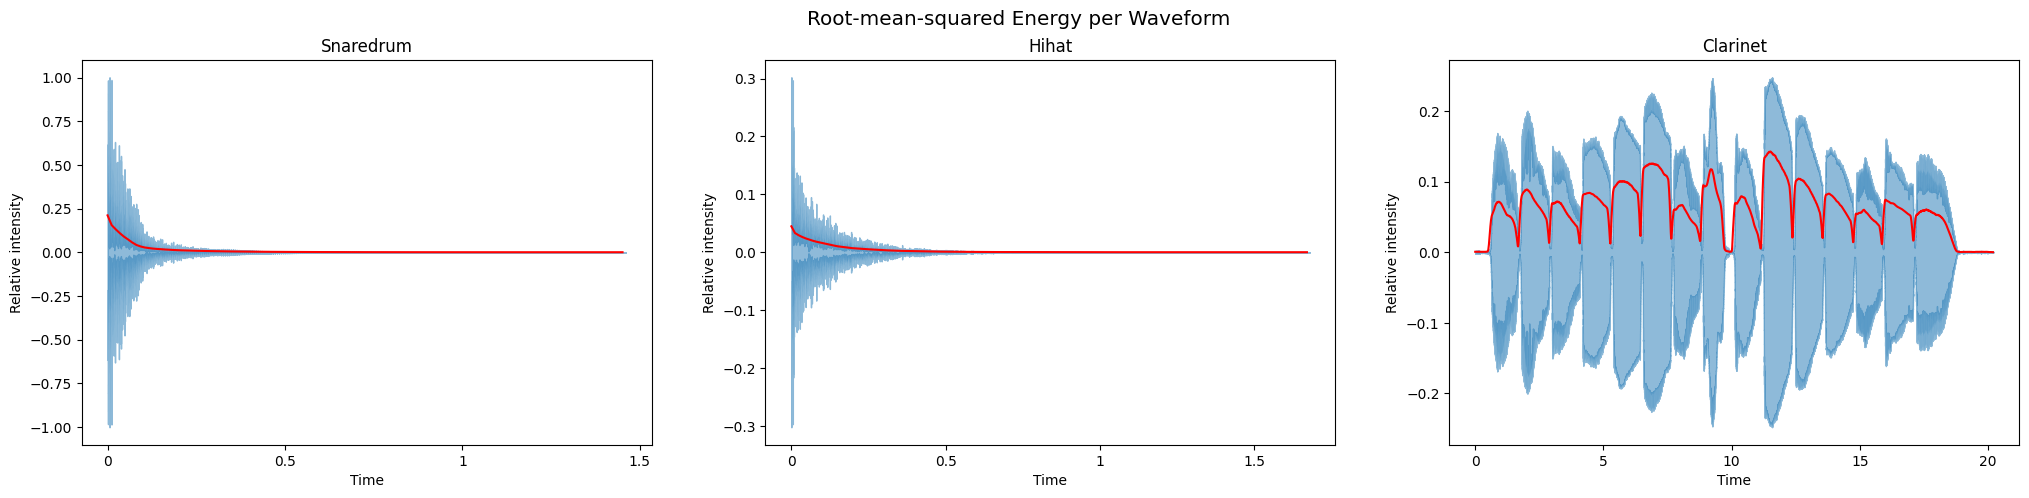

In [10]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")
plt.plot(snaredrum_times, snaredrum_rms, c="r")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")
plt.plot(hihat_times, hihat_rms, c="r")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")
plt.plot(clarinet_times, clarinet_rms, c="r")

plt.suptitle("Root-mean-squared Energy per Waveform", fontsize="x-large")
plt.show()

In [11]:
snaredrum_zcr = zcr(snaredrum, FRAME_SIZE, HOP_LENGTH)

hihat_zcr = zcr(hihat, FRAME_SIZE, HOP_LENGTH)

# Crop to only first 3 seconds of clarinet file
clarinet_zcr = zcr(clarinet[:sr*3], FRAME_SIZE, HOP_LENGTH)
clarinet_times_cropped = frames_to_time(clarinet_zcr, HOP_LENGTH)

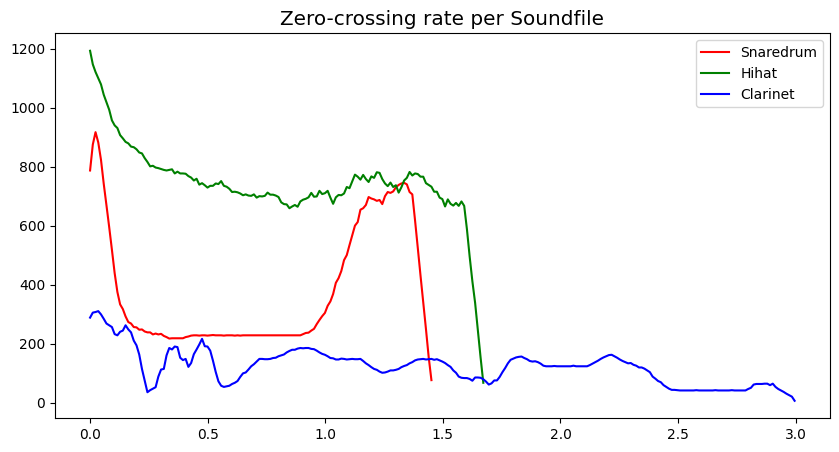

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(snaredrum_times, snaredrum_zcr, c="r", label="Snaredrum")
plt.plot(hihat_times, hihat_zcr, c="g", label="Hihat")
plt.plot(clarinet_times_cropped, clarinet_zcr, c="b", label="Clarinet")

plt.title("Zero-crossing rate per Soundfile", fontsize="x-large")
plt.legend()
plt.show()

## Display the Fourier transform of each waveform

In [13]:
snaredrum_dft = dft(snaredrum)
snaredrum_fft = fft(snaredrum)
snaredrum_np_fft = np.fft.fft(snaredrum)

hihat_dft = dft(hihat)
hihat_fft = fft(hihat)
hihat_np_fft = np.fft.fft(hihat)

clarinet_dft = []#dft(clarinet)
clarinet_fft = fft(clarinet)
clarinet_np_fft = np.fft.fft(clarinet)

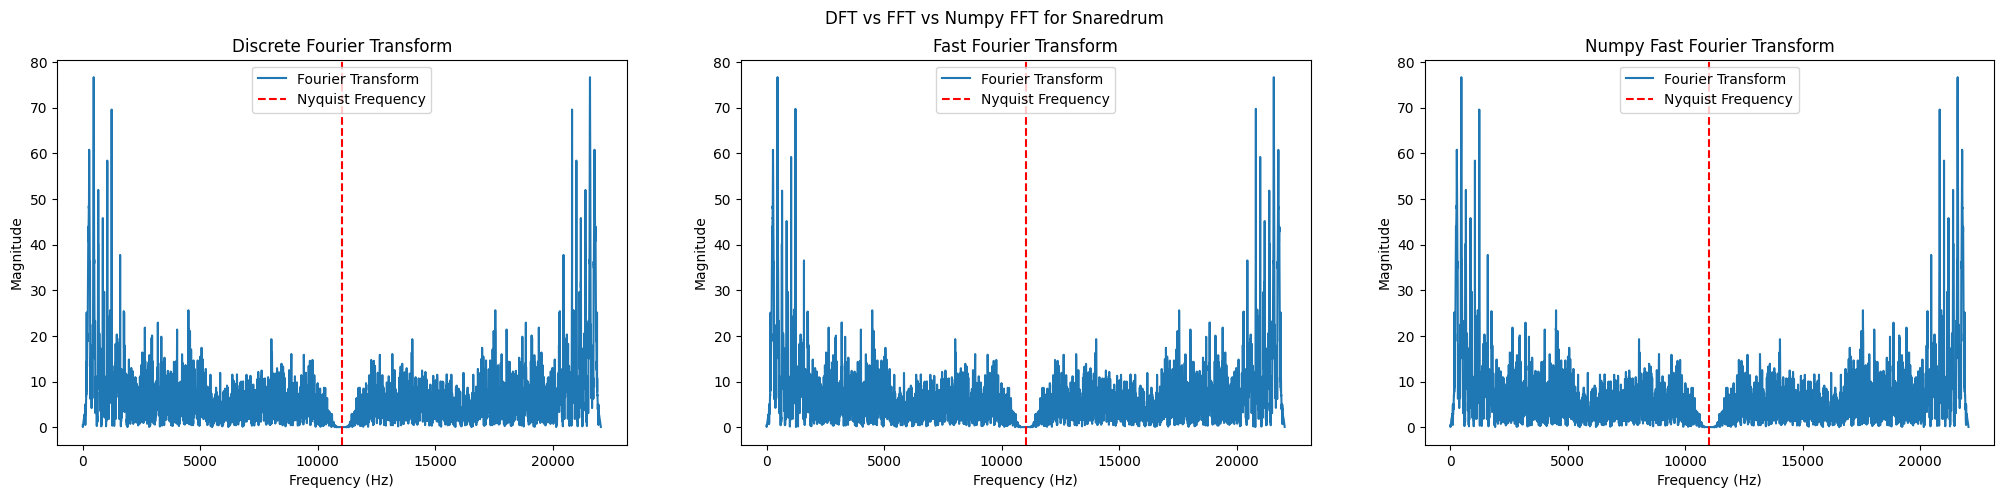

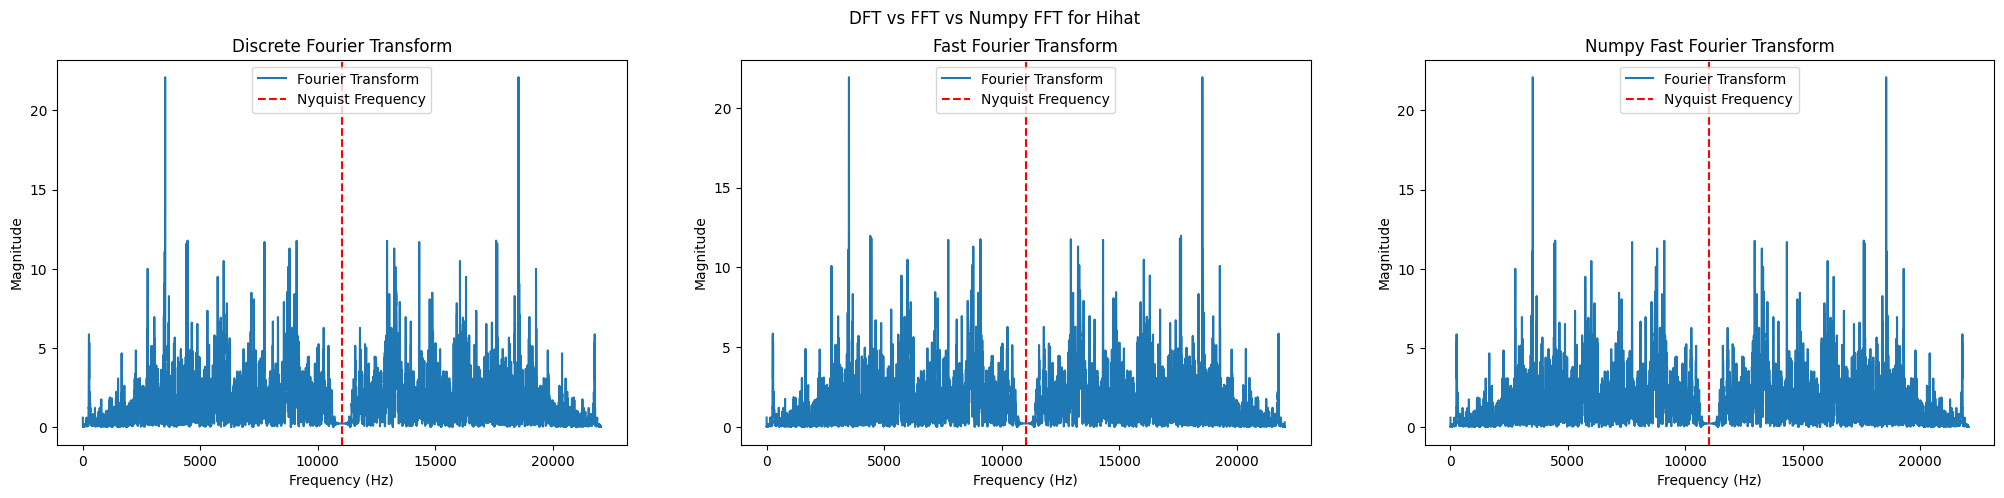

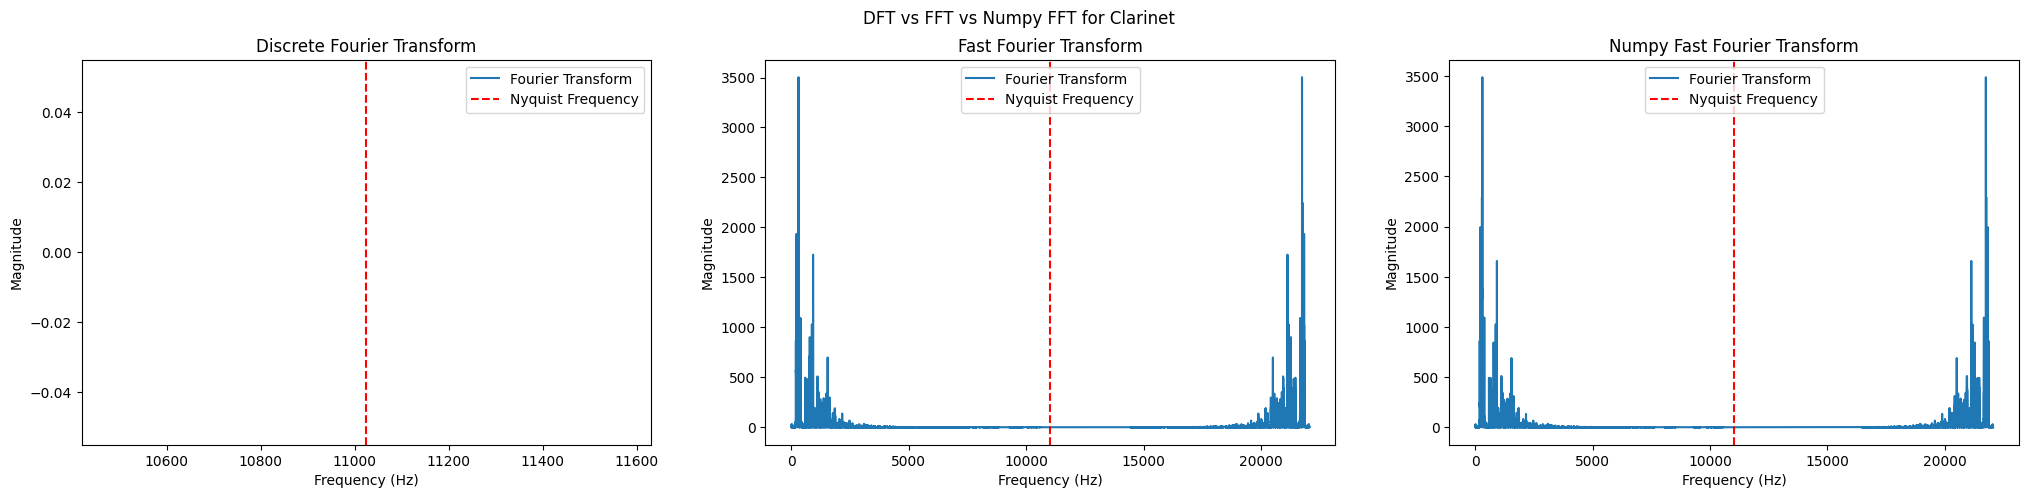

In [14]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_fourier_transform(snaredrum_dft, sr, "Discrete Fourier Transform", True)

plt.subplot(1, 3, 2)
plot_fourier_transform(snaredrum_fft, sr, "Fast Fourier Transform", True)

plt.subplot(1, 3, 3)
plot_fourier_transform(snaredrum_np_fft, sr, "Numpy Fast Fourier Transform", True)

plt.suptitle("DFT vs FFT vs Numpy FFT for Snaredrum")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_fourier_transform(hihat_dft, sr, "Discrete Fourier Transform", True)

plt.subplot(1, 3, 2)
plot_fourier_transform(hihat_fft, sr, "Fast Fourier Transform", True)

plt.subplot(1, 3, 3)
plot_fourier_transform(hihat_np_fft, sr, "Numpy Fast Fourier Transform", True)

plt.suptitle("DFT vs FFT vs Numpy FFT for Hihat")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_fourier_transform(clarinet_dft, sr, "Discrete Fourier Transform", True)

plt.subplot(1, 3, 2)
plot_fourier_transform(clarinet_fft, sr, "Fast Fourier Transform", True)

plt.subplot(1, 3, 3)
plot_fourier_transform(clarinet_np_fft, sr, "Numpy Fast Fourier Transform", True)

plt.suptitle("DFT vs FFT vs Numpy FFT for Clarinet")
plt.show()